<a href="https://colab.research.google.com/github/Sandymyatnoe/Sandymyatnoe/blob/main/01_pytorch_workflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pytorch end to end workflow

import torch
from torch  import nn
import matplotlib.pyplot as plt

torch.__version__

'2.3.1+cu121'

In [ ]:
#1.Data preparing and loading

weight=0.7
bias=0.3
start=0
end=1
step=0.02
X=torch.arange(start, end, step).unsqueeze(dim=1)
y=weight*X+bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

In [ ]:
#splitting into train and test sets

train_split=int(0.8*len(X))
X_train, y_train=X[:train_split], y[:train_split]
X_test, y_test=X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [ ]:
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):

  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c='b', s=6, label="Training data")

  plt.scatter(test_data, test_labels, c='g', s=6, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=6, label="Predictions")

  plt.legend(prop={"size":14})



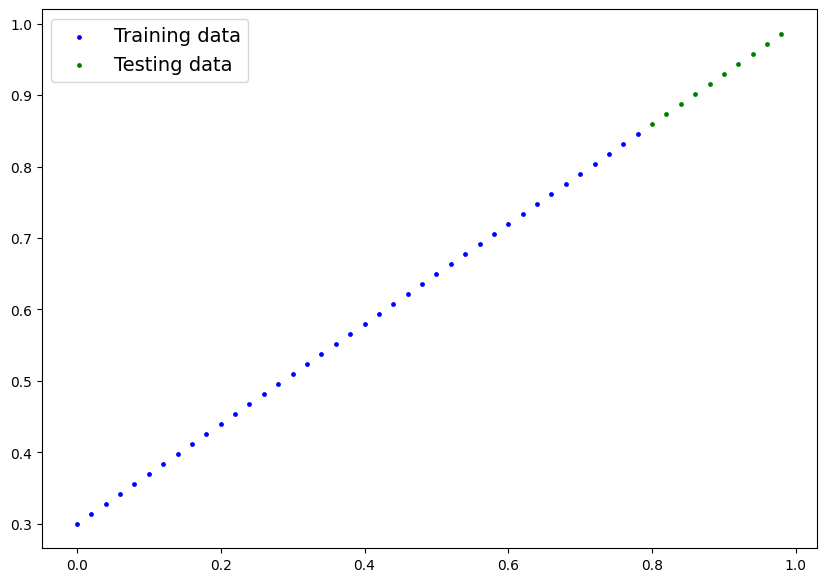

In [ ]:
plot_prediction();

In [ ]:
2. #build model
from torch import nn

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.weights=nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,
                                       requires_grad=True,
                                       dtype=torch.float))

  def forward(self, x:torch.tensor)-> torch.Tensor:
    return self.weights*x+self.bias

In [ ]:
torch.manual_seed(42)

model_0=LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
#list name parameter

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
with torch.inference_mode():
  y_preds=model_0(X_test)

y_preds


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

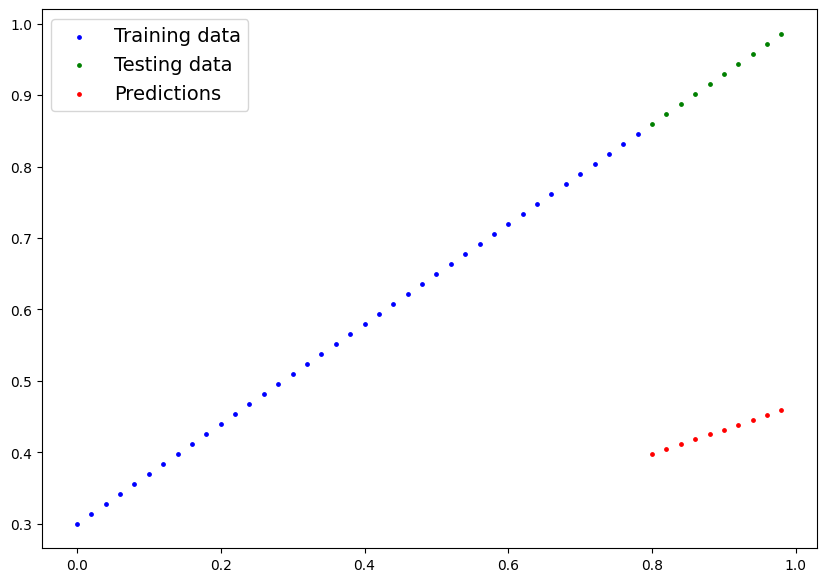

In [ ]:
plot_prediction(predictions=y_preds)

In [ ]:
#3. training the model

#loss function

loss_fn=nn.L1Loss()


#optimizer

optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.01)

In [ ]:
#building training loop

epochs=200


#tracking
epoch_count=[]
train_loss_value=[]
test_loss_value=[]





for epoch in range(epochs):

  model_0.train()

  y_pred=model_0(X_train)

  loss=loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()



  model_0.eval()

  with torch.inference_mode():
    test_pred=model_0(X_test)
    test_loss=loss_fn(test_pred, y_test)

  if epoch%10==0:

    epoch_count.append(epoch)
    train_loss_value.append(loss)
    test_loss_value.append(test_loss)

    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

    print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
with torch.inference_mode():
  y_preds_new=model_0(X_test)

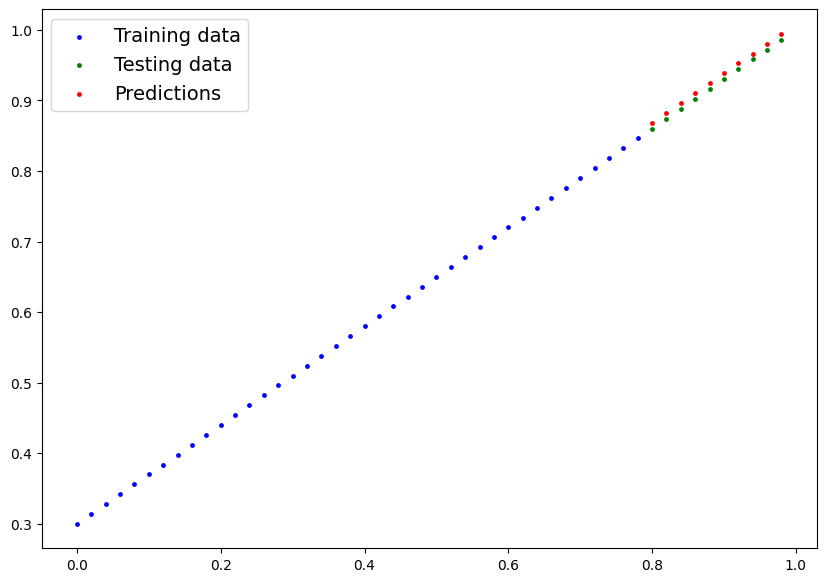

In [ ]:
plot_prediction(predictions=y_preds_new)

In [ ]:
train_loss_value=torch.tensor(train_loss_value).numpy()

In [ ]:
len(train_loss_value)

20

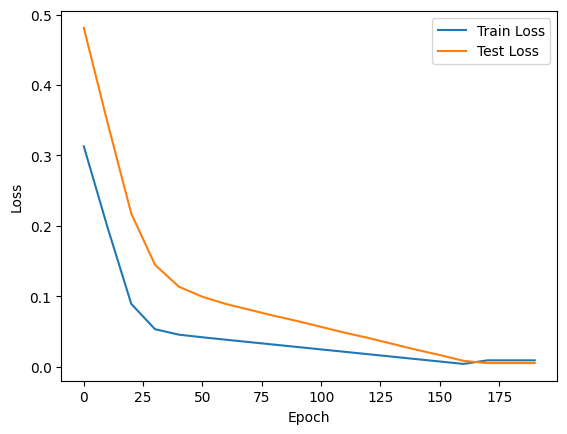

In [ ]:
plt.plot(epoch_count, train_loss_value, label="Train Loss")
plt.plot(epoch_count, test_loss_value, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

In [ ]:
#saving model in pytorch

from pathlib import Path

MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)



MODEL_NAME='01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME


print(f"Saving model to: {MODEL_SAVE_PATH}")

torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)


Saving model to: models/01_pytorch_workflow_model_0.pth


In [ ]:

ls-1 models

01_pytorch_workflow_model_0.pth


In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
#loading a pytorch model

loaded_model_0=LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
test_pred

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
with torch.inference_mode():
  loaded_model_pred=loaded_model_0(X_test)

loaded_model_pred

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
test_pred==loaded_model_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])